In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Variacao do Raio

In [226]:
caminho = 'TabelasVariacaoRaio/'
acuracia_teste_raio  = pd.read_csv(caminho+'acuracia_teste.csv')
acuracia_treino_raio = pd.read_csv(caminho+'acuracia_treino.csv')
norma_peso_raio      = pd.read_csv(caminho+'norma_peso.csv')
perda_teste_raio     = pd.read_csv(caminho+'perda_teste.csv')
perda_treino_raio    = pd.read_csv(caminho+'perda_treino.csv')
colunas = acuracia_treino_raio.columns
colunas_parametros = colunas[1:4]
colunas_epocas = colunas[5:-1]
colunas_epocas_int = np.array(list(map(int,colunas_epocas)))

In [213]:
acuracia_teste_raio.head()

,metodo,passo_inicial,iteracoes,raio,semente,1,2,3,4,5,...,92,93,94,95,96,97,98,99,100,tempo
0,FDIPA,0.23112,2,2,0,0.1071,0.1057,0.0942,0.0925,0.1057,...,0.0968,0.0968,0.1010,0.0927,0.1010,0.1010,0.0996,0.1126,0.1126,1044.338516
1,FDIPA,0.23112,2,2,1,0.1023,0.1023,0.0955,0.1016,0.1016,...,0.1137,0.1023,0.1137,0.1137,0.1037,0.1017,0.1137,0.1002,0.1017,1021.056653
2,FDIPA,0.23112,2,2,2,0.1127,0.1021,0.1052,0.0954,0.0954,...,0.0960,0.0905,0.1127,0.0950,0.1127,0.0905,0.1056,0.1127,0.0981,1020.503418
3,FDIPA,0.23112,2,2,3,0.1146,0.0982,0.0981,0.0988,0.0981,...,0.0981,0.0988,0.1043,0.0981,0.1043,0.1146,0.0982,0.0965,0.1146,1022.350853
4,FDIPA,0.23112,2,2,4,0.1018,0.0962,0.1020,0.0962,0.1050,...,0.0851,0.1050,0.0918,0.1139,0.1139,0.1139,0.1139,0.1050,0.0851,1024.071205


Função para transformar nosso Data Frame em uma serie com as colunas das épocas separadas.

In [227]:
# Para a seção de variação de raio
def df_to_time_series_raio(df, option, colunas_parametros, colunas_epocas) -> pd.core.frame.DataFrame:
    """
    Parametros
    ----------
    df : o dataframe que se deseja transformar em serie temporal
    Option : {1='acuracia_teste', 2='acuracia_treino', 3='noma_peso', 4='perda_teste', 5='perda_treino'}
        opção para o tipo de serie temporal tratada nesse contexto.  
    """

    options = {1:'acuracia_teste', 2:'acuracia_treino', 3:'norma_peso', 4:'perda_teste', 5:'perda_treino'}
    time_series = df.melt(id_vars = colunas_parametros, value_vars = colunas_epocas, var_name = 'epoca', value_name = options[option])
    time_series['epoca'] = pd.to_numeric(time_series['epoca'])
    time_series = time_series.sort_values(by=['raio', 'epoca'])
    
    return time_series

Obtendo o DataFrame de serie temporal para todos os data frames.

In [78]:
acuracia_teste_raio_ts  = df_to_time_series_raio(acuracia_teste_raio, 1, colunas_parametros, colunas_epocas)
acuracia_treino_raio_ts = df_to_time_series_raio(acuracia_treino_raio, 2, colunas_parametros, colunas_epocas)
norma_peso_raio_ts      = df_to_time_series_raio(norma_peso_raio, 3, colunas_parametros, colunas_epocas)
perda_teste_raio_ts     = df_to_time_series_raio(perda_teste_raio, 4, colunas_parametros, colunas_epocas)
perda_treino_raio_ts    = df_to_time_series_raio(perda_treino_raio, 5, colunas_parametros, colunas_epocas)
acuracia_teste_raio_ts.sample(10)

,passo_inicial,iteracoes,raio,epoca,acuracia_teste
14669,0.23112,2,100,98,0.9312
6228,0.23112,2,50,42,0.9543
81,0.23112,2,50,1,0.8841
3171,0.23112,2,2,22,0.1003
13717,0.23112,2,50,92,0.9546
4911,0.23112,2,100,33,0.9423
289,0.23112,2,1000,2,0.2917
6211,0.23112,2,50,42,0.9578
6126,0.23112,2,1000,41,0.7167
5045,0.23112,2,100,34,0.9484


## Métricas ao longo das épocas

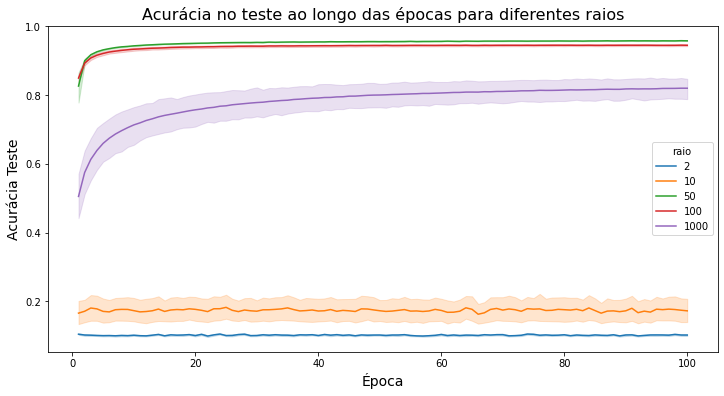

In [56]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="epoca", y="acuracia_teste", hue='raio', data=acuracia_teste_raio_ts, palette = "tab10")
plt.title('Acurácia no teste ao longo das épocas para diferentes raios', fontsize=16)
plt.xlabel("Época", fontsize=14)
plt.ylabel("Acurácia Teste", fontsize=14)
plt.show()

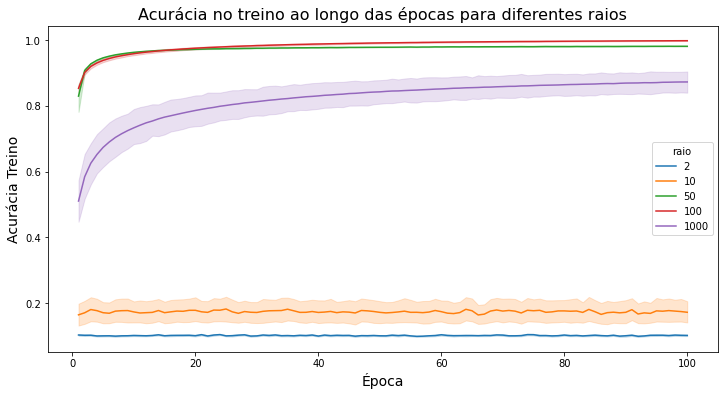

In [58]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="epoca", y="acuracia_treino", hue='raio', data=acuracia_treino_raio_ts, palette = "tab10")
plt.title('Acurácia no treino ao longo das épocas para diferentes raios',fontsize=16)
plt.xlabel("Época", fontsize=14)
plt.ylabel("Acurácia Treino", fontsize=14)
plt.show()

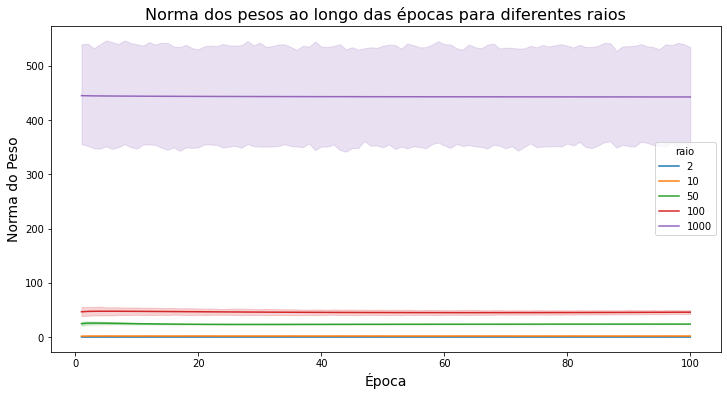

In [71]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="epoca", y='norma_peso', hue='raio', data=norma_peso_raio_ts, palette = "tab10")
plt.title('Norma dos pesos ao longo das épocas para diferentes raios',fontsize=16)
plt.xlabel("Época", fontsize=14)
plt.ylabel("Norma do Peso", fontsize=14)
plt.show()

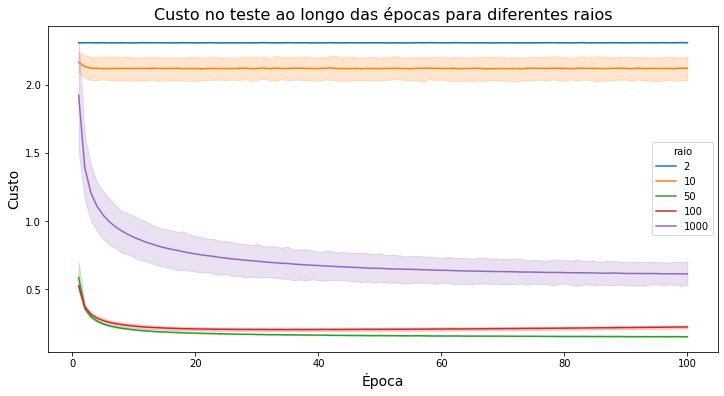

In [76]:
plt.figure(figsize=(12, 6))
sns.lineplot(x = 'epoca', y = 'perda_teste', hue='raio', data=perda_teste_raio_ts, palette = 'tab10')
plt.title('Custo no teste ao longo das épocas para diferentes raios',fontsize=16)
plt.xlabel('Época', fontsize=14)
plt.ylabel('Custo', fontsize=14)
plt.show()

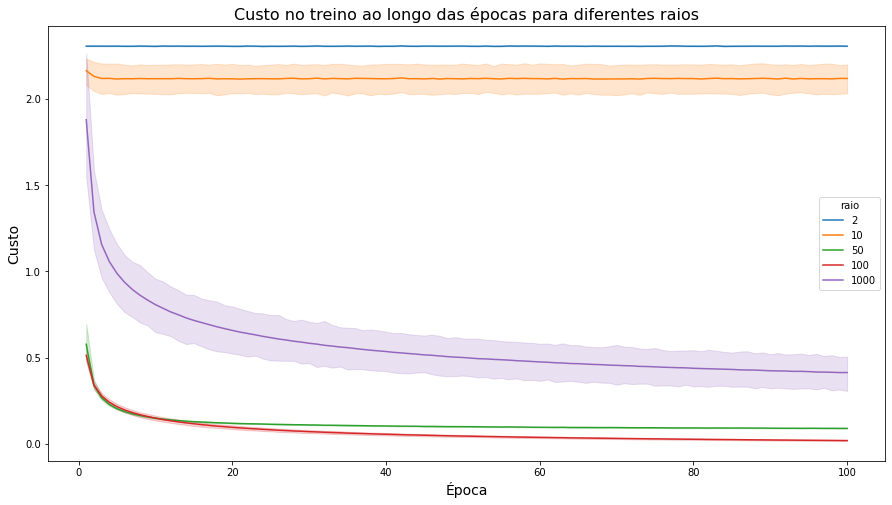

In [223]:
plt.figure(figsize=(15, 8))
sns.lineplot(x = 'epoca', y = 'perda_treino', hue='raio', data=perda_treino_raio_ts, palette = 'tab10')
plt.title('Custo no treino ao longo das épocas para diferentes raios',fontsize=16)
plt.xlabel('Época', fontsize=14)
plt.ylabel('Custo', fontsize=14)
plt.show()

## Acuracia treino X acurácia teste (média, desvio padrão, máximo e tempo)

In [176]:
left  = acuracia_treino_raio.groupby(by=['raio'])['100'].agg(['mean','std']).reset_index()
rigth = pd.DataFrame(acuracia_teste_raio.groupby(by=['raio'])['100','tempo'].agg(['mean','std','max'])).reset_index()
cols = [col[0] + '_' + col[1] if col[1] != '' else col[0] for col in rigth.columns.values]
cols = [col if col[:3] != '100' else 'Acuracia Teste' + col[3:] for col in cols]
rigth.columns = cols
left.columns = ['raio', 'Acuracia Treino média', 'Acuracia Treino std']
acuracia_treino_vs_acuracia_teste = pd.merge(left, rigth, left_on = ['raio'], right_on = ['raio'])
acuracia_treino_vs_acuracia_teste.apply(lambda x : round(x,4))

<ipython-input-176-2093a0c79deb>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rigth = pd.DataFrame(acuracia_teste_raio.groupby(by=['raio'])['100','tempo'].agg(['mean','std','max'])).reset_index()


,raio,Acuracia Treino média,Acuracia Treino std,Acuracia Teste_mean,Acuracia Teste_std,Acuracia Teste_max,tempo_mean,tempo_std,tempo_max
0,2,0.1025,0.0057,0.1024,0.0073,0.1159,955.4742,85.8645,1133.5703
1,10,0.1728,0.0949,0.1728,0.0950,0.3822,851.5179,292.9170,1921.3423
2,50,0.9809,0.0012,0.9574,0.0018,0.9602,1082.8635,196.9578,1251.5266
3,100,0.9978,0.0021,0.9445,0.0072,0.9562,904.9324,215.3353,1245.9237
4,1000,0.8725,0.0913,0.8197,0.0849,0.9357,767.1621,86.0768,899.5493


## Custo treino X custo teste (média, desvio padrão, mínimo e tempo)

In [183]:
left  = perda_treino_raio.groupby(by=['raio'])['100'].agg(['mean','std']).reset_index()
rigth = pd.DataFrame(perda_teste_raio.groupby(by=['raio'])['100','tempo'].agg(['mean','std','min'])).reset_index()
cols = [col[0] + '_' + col[1] if col[1] != '' else col[0] for col in rigth.columns.values]
cols = [col if col[:3] != '100' else 'Custo Teste' + col[3:] for col in cols]
rigth.columns = cols
left.columns = ['raio', 'Custo Treino média', 'Custo Treino std']
perda_treino_vs_perda_teste = pd.merge(left, rigth, left_on = ['raio'], right_on = ['raio'])
perda_treino_vs_perda_teste = perda_treino_vs_perda_teste.apply(lambda x : round(x,4))
perda_treino_vs_perda_teste

<ipython-input-183-af89c460141a>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rigth = pd.DataFrame(perda_teste_raio.groupby(by=['raio'])['100','tempo'].agg(['mean','std','min'])).reset_index()


,raio,Custo Treino média,Custo Treino std,Custo Teste_mean,Custo Teste_std,Custo Teste_min,tempo_mean,tempo_std,tempo_min
0,2,2.3078,0.0023,2.3083,0.0025,2.3028,955.4742,85.8645,721.2763
1,10,2.1203,0.2441,2.1208,0.2446,1.6630,851.5179,292.9170,706.4308
2,50,0.0890,0.0036,0.1517,0.0051,0.1386,1082.8635,196.9578,707.7122
3,100,0.0184,0.0088,0.2236,0.0332,0.1805,904.9324,215.3353,702.9527
4,1000,0.4131,0.2815,0.6132,0.2402,0.2929,767.1621,86.0768,704.4184


## Norma do peso inicial e final (min, max, media, desvio padrão)

In [182]:
tab_norma_peso = norma_peso_raio.groupby(by=['raio'])[['1','100']].agg(['min', 'max','mean','std']).reset_index()
tab_norma_peso = tab_norma_peso.apply(lambda x: round(x,4))
tab_norma_peso

raio        1                                    100                      \
             min       max      mean       std      min       max      mean   
0     2   0.0594    0.1797    0.1146    0.0311   0.0487    0.1957    0.1196   
1    10   0.1534    4.9117    1.5742    1.8675   0.1632    5.1084    1.8292   
2    50   7.1122   42.8719   24.5968   10.7259  23.3973   24.4013   23.8488   
3   100  13.5439   87.7254   46.5134   24.1258  36.8955   69.4264   45.8380   
4  1000  58.2171  887.7154  445.0257  268.6212  74.6481  877.8005  442.5983   

             
        std  
0    0.0268  
1    2.0491  
2    0.2383  
3   10.1491  
4  261.6764

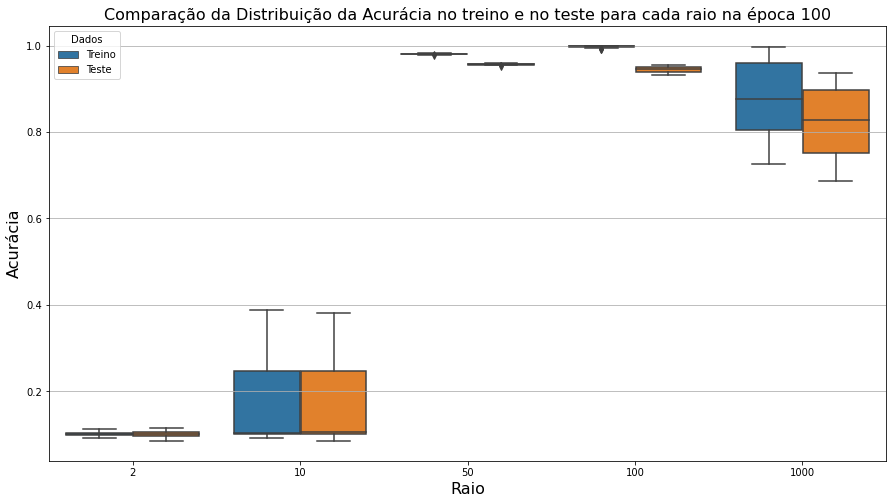

In [212]:
tab_aux1 = acuracia_treino_raio[['raio','semente','100']]
tab_aux1 = tab_aux1.assign(Dados='Treino')

tab_aux2 = acuracia_teste_raio[['raio','semente','100']]
tab_aux2 = tab_aux2.assign(Dados='Teste')
tab_aux = pd.concat([tab_aux1,tab_aux2],axis=0)

plt.figure(figsize=(15,8))
sns.boxplot(data = tab_aux, x = 'raio', y = '100', hue = 'Dados')
plt.title('Comparação da Distribuição da Acurácia no treino e no teste para cada raio na época 100', fontsize = 16)
plt.xlabel('Raio', fontsize = 16)
plt.ylabel('Acurácia', fontsize = 16)
plt.grid(axis='y')
plt.show()

In [238]:
tempo = acuracia_teste_raio['tempo'].sum()
print(f'Tempo total para realizar os treinos dessa base: {tempo:.3f} s = {tempo/3600:.3f} h')

Tempo total para realizar os treinos dessa base: 136858.502 s = 38.016 h


# Variação Iteração

In [254]:
caminho = 'TabelasVariacaoIteracao/'
acuracia_teste_iteracao  = pd.read_csv(caminho+'acuracia_teste.csv')
acuracia_treino_iteracao = pd.read_csv(caminho+'acuracia_treino.csv')
norma_peso_iteracao      = pd.read_csv(caminho+'norma_peso.csv')
perda_teste_iteracao     = pd.read_csv(caminho+'perda_teste.csv')
perda_treino_iteracao    = pd.read_csv(caminho+'perda_treino.csv')
colunas = acuracia_treino_iteracao.columns
colunas_parametros = colunas[1:4]
colunas_epocas = colunas[5:-1]
colunas_epocas_int = np.array(list(map(int,colunas_epocas)))

## Dando uma olhada na base

In [284]:
acuracia_teste_iteracao.sample(5)

,metodo,passo_inicial,iteracoes,raio,semente,1,2,3,4,5,...,92,93,94,95,96,97,98,99,100,tempo
48,FDIPA,0.23112,2,49,18,0.8677,0.9070,0.9171,0.9259,0.9321,...,0.9550,0.9575,0.9574,0.9545,0.9568,0.9559,0.9575,0.9572,0.9559,723.056687
126,FDIPA,0.23112,10,49,6,0.9148,0.9310,0.9302,0.9415,0.9400,...,0.9554,0.9567,0.9545,0.9554,0.9561,0.9563,0.9543,0.9560,0.9550,2657.837491
27,FDIPA,0.23112,1,49,27,0.7572,0.8811,0.9033,0.9134,0.9179,...,0.9503,0.9494,0.9492,0.9494,0.9508,0.9501,0.9490,0.9490,0.9485,724.167594
128,FDIPA,0.23112,10,49,8,0.9178,0.9283,0.9347,0.9393,0.9417,...,0.9563,0.9552,0.9556,0.9539,0.9548,0.9557,0.9576,0.9534,0.9558,2645.733000
24,FDIPA,0.23112,1,49,24,0.8076,0.8939,0.9103,0.9184,0.9242,...,0.9480,0.9496,0.9483,0.9487,0.9484,0.9496,0.9492,0.9501,0.9493,1006.124502


Função semelhante a definida anteriormente mas agora para o contexto de variação da iteracao

In [289]:
# Para a seção de variação da iteracao
def df_to_time_series_iteracao(df, option, colunas_parametros, colunas_epocas) -> pd.core.frame.DataFrame:
    """
    Parametros
    ----------
    df : o dataframe que se deseja transformar em serie temporal
    Option : {1='acuracia_teste', 2='acuracia_treino', 3='noma_peso', 4='perda_teste', 5='perda_treino'}
        opção para o tipo de serie temporal tratada nesse contexto.  
    """

    options = {1:'acuracia_teste', 2:'acuracia_treino', 3:'norma_peso', 4:'perda_teste', 5:'perda_treino'}
    time_series = df.melt(id_vars = colunas_parametros, value_vars = colunas_epocas, var_name = 'epoca', value_name = options[option])
    time_series['epoca'] = pd.to_numeric(time_series['epoca'])
    time_series = time_series.sort_values(by=['iteracoes', 'epoca'])
    
    return time_series

Obtendo o DataFrame de serie temporal para todos os data frames.

In [290]:
acuracia_teste_iteracao_ts  = df_to_time_series_iteracao(acuracia_teste_iteracao, 1, colunas_parametros, colunas_epocas)
acuracia_treino_iteracao_ts = df_to_time_series_iteracao(acuracia_treino_iteracao, 2, colunas_parametros, colunas_epocas)
norma_peso_iteracao_ts      = df_to_time_series_iteracao(norma_peso_iteracao, 3, colunas_parametros, colunas_epocas)
perda_teste_iteracao_ts     = df_to_time_series_iteracao(perda_teste_iteracao, 4, colunas_parametros, colunas_epocas)
perda_treino_iteracao_ts    = df_to_time_series_iteracao(perda_treino_iteracao, 5, colunas_parametros, colunas_epocas)
acuracia_teste_iteracao_ts.sample(10)

,passo_inicial,iteracoes,raio,epoca,acuracia_teste
1686,0.23112,2,49,12,0.9444
14686,0.23112,10,49,98,0.9557
14223,0.23112,10,49,95,0.9567
7559,0.23112,2,49,51,0.9566
11046,0.23112,7,49,74,0.9502
13996,0.23112,2,49,94,0.9557
9147,0.23112,10,49,61,0.9554
93,0.23112,7,49,1,0.8957
5623,0.23112,5,49,38,0.9540
10810,0.23112,1,49,73,0.9482


# Variação Eta

In [274]:
caminho = 'TabelasVariacaoEta/'
acuracia_teste_eta  = pd.read_csv(caminho+'acuracia_teste.csv')
acuracia_treino_eta = pd.read_csv(caminho+'acuracia_treino.csv')
norma_peso_eta      = pd.read_csv(caminho+'norma_peso.csv')
perda_teste_eta     = pd.read_csv(caminho+'perda_teste.csv')
perda_treino_eta    = pd.read_csv(caminho+'perda_treino.csv')
colunas = acuracia_treino_eta.columns
colunas_parametros = colunas[1:4]
colunas_epocas = colunas[5:-1]
colunas_epocas_int = np.array(list(map(int,colunas_epocas)))

In [275]:
acuracia_teste_eta = acuracia_teste_eta.append(acuracia_teste_iteracao.query('raio == 49 and iteracoes == 2'))
acuracia_treino_eta = acuracia_treino_eta.append(acuracia_treino_iteracao.query('raio == 49 and iteracoes == 2'))
norma_peso_eta     = norma_peso_eta.append(norma_peso_iteracao.query('raio == 49 and iteracoes == 2'))
perda_teste_eta    = perda_teste_eta.append(perda_teste_iteracao.query('raio == 49 and iteracoes == 2'))
perda_treino_eta   = perda_treino_eta.append(perda_treino_iteracao.query('raio == 49 and iteracoes == 2'))

## Dando uma olhada na base

In [247]:
acuracia_teste_eta.head()

,metodo,passo_inicial,iteracoes,raio,semente,1,2,3,4,5,...,92,93,94,95,96,97,98,99,100,tempo
0,FDIPA,0.01,2,49,0,0.3070,0.4565,0.5494,0.6068,0.6666,...,0.9222,0.9230,0.9221,0.9228,0.9228,0.9240,0.9240,0.9240,0.9236,2413.163610
1,FDIPA,0.01,2,49,1,0.1167,0.1919,0.4038,0.5222,0.5497,...,0.9344,0.9344,0.9350,0.9350,0.9352,0.9347,0.9358,0.9357,0.9361,1535.943518
2,FDIPA,0.01,2,49,2,0.2929,0.4657,0.5287,0.5959,0.6392,...,0.9251,0.9252,0.9248,0.9256,0.9255,0.9256,0.9261,0.9259,0.9268,779.796806
3,FDIPA,0.01,2,49,3,0.1146,0.1146,0.1146,0.1146,0.1146,...,0.9150,0.9158,0.9171,0.9166,0.9174,0.9182,0.9188,0.9200,0.9200,1025.752975
4,FDIPA,0.01,2,49,4,0.1324,0.2368,0.3002,0.3444,0.4169,...,0.9309,0.9312,0.9318,0.9317,0.9320,0.9319,0.9322,0.9321,0.9330,981.459803


Função semelhante a definida anteriormente mas agora para o contexto de variação do eta

In [242]:
# Para a seção de variação de eta
def df_to_time_series_eta(df, option, colunas_parametros, colunas_epocas) -> pd.core.frame.DataFrame:
    """
    Parametros
    ----------
    df : o dataframe que se deseja transformar em serie temporal
    Option : {1='acuracia_teste', 2='acuracia_treino', 3='noma_peso', 4='perda_teste', 5='perda_treino'}
        opção para o tipo de serie temporal tratada nesse contexto.  
    """

    options = {1:'acuracia_teste', 2:'acuracia_treino', 3:'norma_peso', 4:'perda_teste', 5:'perda_treino'}
    time_series = df.melt(id_vars = colunas_parametros, value_vars = colunas_epocas, var_name = 'epoca', value_name = options[option])
    time_series['epoca'] = pd.to_numeric(time_series['epoca'])
    time_series = time_series.sort_values(by=['passo_inicial', 'epoca'])
    
    return time_series

Obtendo o DataFrame de serie temporal para todos os data frames.

In [270]:
acuracia_teste_eta_ts  = df_to_time_series_eta(acuracia_teste_eta, 1, colunas_parametros, colunas_epocas)
acuracia_treino_eta_ts = df_to_time_series_eta(acuracia_treino_eta, 2, colunas_parametros, colunas_epocas)
norma_peso_eta_ts      = df_to_time_series_eta(norma_peso_eta, 3, colunas_parametros, colunas_epocas)
perda_teste_eta_ts     = df_to_time_series_eta(perda_teste_eta, 4, colunas_parametros, colunas_epocas)
perda_treino_eta_ts    = df_to_time_series_eta(perda_treino_eta, 5, colunas_parametros, colunas_epocas)
acuracia_teste_eta_ts.sample(10)

,passo_inicial,iteracoes,raio,epoca,acuracia_teste
7607,1.00000,2,49,51,0.9478
13019,1.00000,2,49,87,0.9488
1271,0.50000,2,49,9,0.9462
10450,1.00000,2,49,70,0.9479
396,1.00000,2,49,3,0.9322
605,0.01000,2,49,5,0.1124
2527,0.23112,2,49,17,0.9482
7256,0.10000,2,49,49,0.9536
5845,0.23112,2,49,39,0.9545
14452,0.10000,2,49,97,0.9552


## Métricas ao longo das épocas

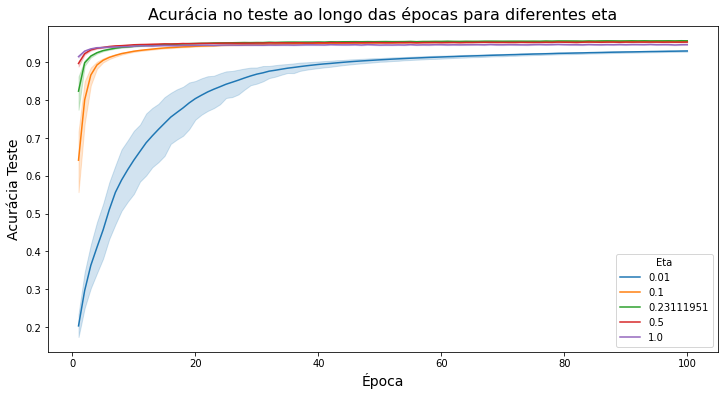

In [273]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="epoca", y="acuracia_teste", hue='passo_inicial', data=acuracia_teste_eta_ts, palette = "tab10")
plt.title('Acurácia no teste ao longo das épocas para diferentes eta', fontsize=16)
plt.xlabel('Época', fontsize=14)
plt.ylabel('Acurácia Teste', fontsize=14)
plt.legend(title = 'Eta')
plt.show()